In [50]:
!pip install konlpy

In [51]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum

import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic')

fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


In [52]:
import pandas as pd
from konlpy.tag import Twitter

import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
import os
print(os.listdir('/content/drive/My Drive/Colab Notebooks/Data'))

['cars_part_quality.csv', 'term_data_without_pred.csv', 'titanic.csv', 'titanic_term_without_y.csv', 'fine_dust.csv', 'term_fine_dust_without_y.csv', 'bdi.csv', 'News.csv', 'datasets_19_420_Iris.csv', 'car.csv', 'test_car.csv', 'stock.csv', 'gear']


In [54]:
news = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Data/News.csv", encoding='utf-8')
print(news.columns)

Index(['뉴스식별자', '일자', '언론사', '기고자', '제목', '통합 분류1', '통합 분류2', '통합 분류3',
       '사건/사고 분류1', '사건/사고 분류2', '사건/사고 분류3', '인물', '위치', '기관', '키워드', '특성추출',
       '본문', 'URL', '분석제외 여부'],
      dtype='object')


In [55]:
news['본문'][0:10]

0    울산·부산지역 중소기업의 이번달 업황전망이 부정적으로 나타났다... .. .. .....
1    2019년 기해(己亥)년은 천간은 음토(陰土)요, 지지는 해수(亥水)다... 천간 ...
2    지난해 북미와 일본 펀드는 높이 날았지만 그만큼 골도 깊었다... 미국과 일본의 경...
3    세계 뒤흔드는 트럼프노믹스 .. ..최소 1년은 상승장 전망 우세..美 실업률 49...
4    [머니투데이 뉴욕(미국)=송정렬 특파원] .. ..유가가 올해 마지막 거래일에 소폭...
5    [머니투데이 변휘 기자] ◆산업은행  <승진> ▷수석부행장 △성주영 ▷부행장(부문장...
6    [머니투데이 뉴욕(미국)=송정렬 특파원] .. ..달러가 약세를 보였다... 하지만...
7    지난해 천당과 지옥을 오갔던 국내 주식시장이 기해년 새해를 맞아 힘찬 도약을 준비하...
8    글로벌 경기 둔화 신호가 글로벌 곳곳에서 나오는 가운데 2019년 기업들의 실적도 ...
9    지난해 유가증권시장에서 3만7180원(227.82%) 올랐다. 12월28일 종가는 ...
Name: 본문, dtype: object

# 자연어처리 절차

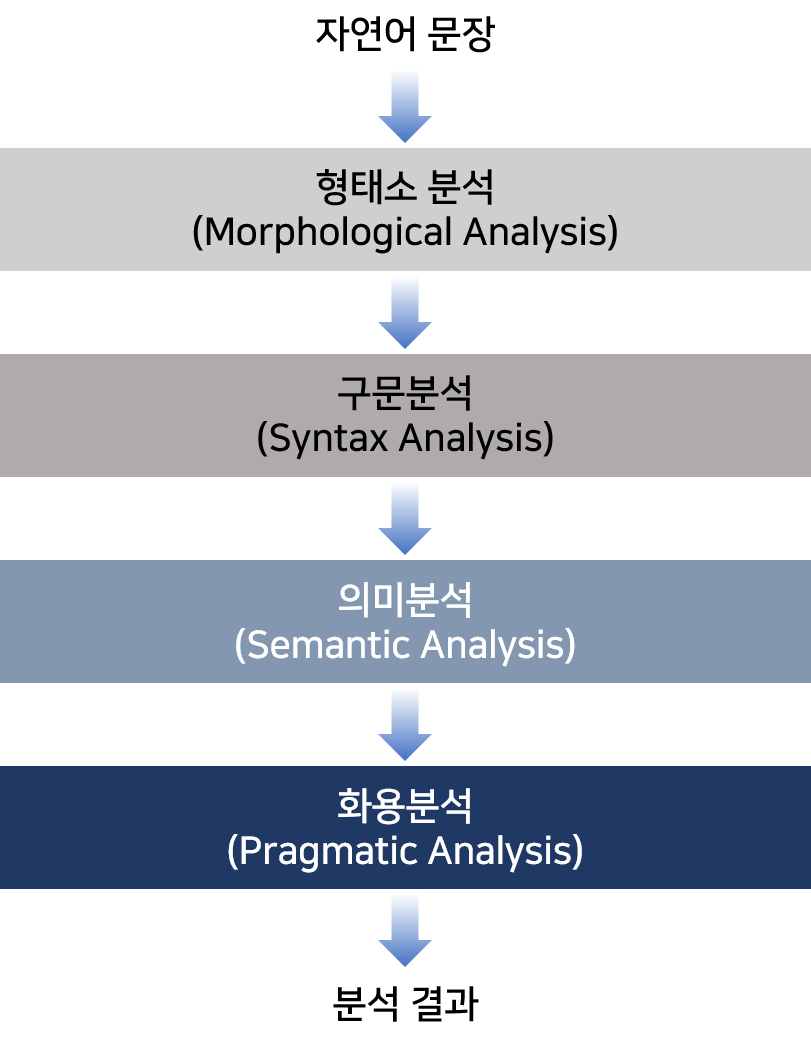

1. 형태소 분석

* 입력된 문자열을 분석하여
형태소(morpheme)라는 최소 의미 단위로 분리

* 사전 정보와 형태소 결합 정보 이용

* 정규 문법(Regular Grammar)으로 분석 가능

* 언어에 따라 난이도가 다름

> 영어, 불어 : 쉬움

> 한국어, 일본어, 아랍어, 터키어 : 어려움

* 정규표현식이란?

> 정규표현식의 사전적인 의미로는 특정한 규칙을 가진 문자열의 집합을 표현하는데 사용하는 형식 언어

> Programming Language나 Text Editor 등 에서 문자열의 검색과 치환을 위한 용도로사용


* 정규 표현식 종류

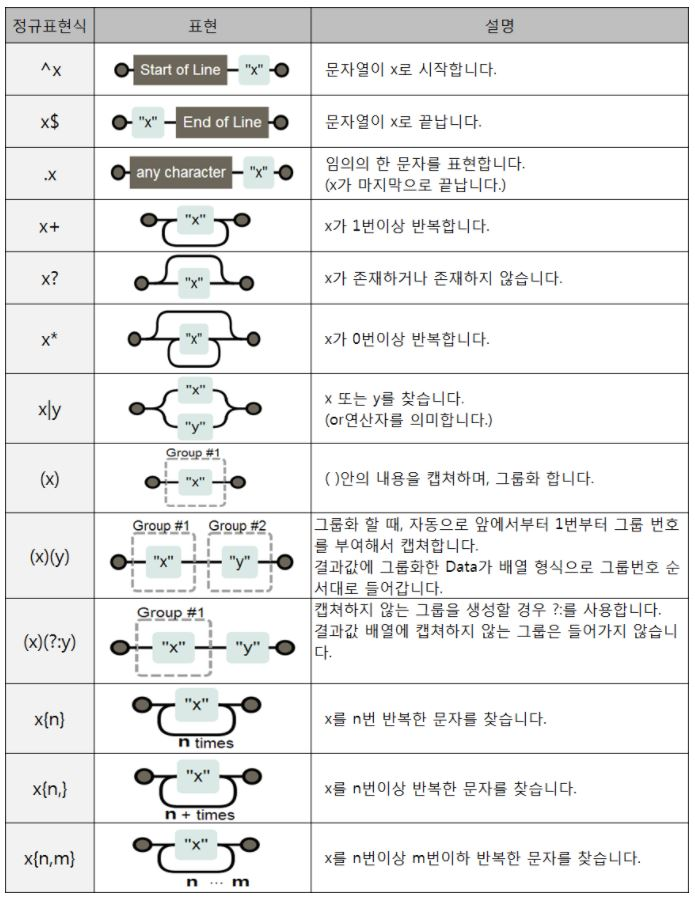

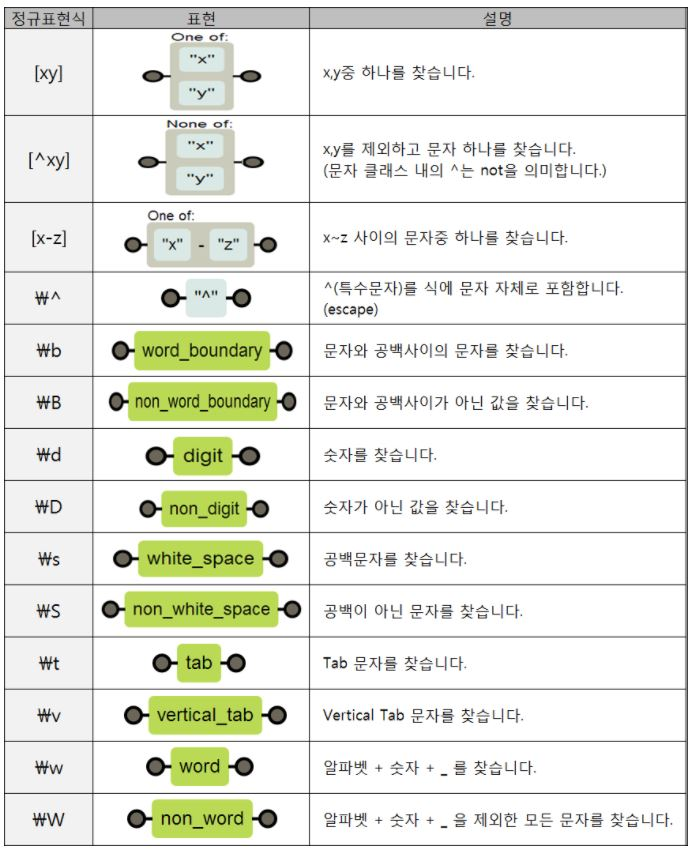

* 정규식 적용 예시

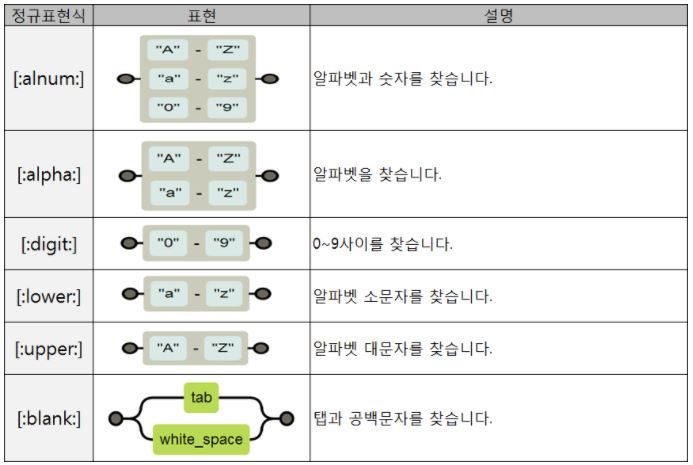

In [56]:
# 정규식 적용을 위한 라이브러리 호출
import re

# 정규식에서 일치되는 부분 추출
text = 'ㅋㅋㅋ 안녕하세요'
re.compile('[ㄱ-ㅎ]+').findall(text)

['ㅋㅋㅋ']

In [57]:
# 정규식에서 일치되지 않는 부분 추출
text = 'ㅋㅋㅋ 안녕하세요'
re.compile('[ㄱ-ㅎ]+').sub("",text)

' 안녕하세요'

In [58]:
hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')
text = news['본문'][0]
result = hangul.sub('', text)
print('#============================================#')
print('정규식 적용 전')
print('#============================================#')
print(text)
print('#============================================#')
print('정규식 적용 후')
print('#============================================#')
print(result)

#============================================#
정규식 적용 전
#============================================#
울산·부산지역 중소기업의 이번달 업황전망이 부정적으로 나타났다... .. .. ..중소기업중앙회 부산·울산본부는 지난 14일부터 20일까지 지역 중소기업 335개사를 대상으로 벌인 ..'중소기업 경기전망조사' 결과 올해 1월 중소기업 업황전망 건강도지수(SBHI)는 전달보다 5.1p 떨어진 75.7로 나타났다고 1일 밝혔다... .. .. ..이는 지난..
#============================================#
정규식 적용 후
#============================================#
울산부산지역 중소기업의 이번달 업황전망이 부정적으로 나타났다   중소기업중앙회 부산울산본부는 지난 일부터 일까지 지역 중소기업 개사를 대상으로 벌인 중소기업 경기전망조사 결과 올해 월 중소기업 업황전망 건강도지수는 전달보다  떨어진 로 나타났다고 일 밝혔다   이는 지난


* 단어 토큰화:  토큰화(tokenization)란 문장을 토큰(token) 시퀀스로 분절하는 과정을 의미함

> 토큰화를 수행하는 프로그램을 토크나이저(tokenizer)라고함

> 대표적인 한국어 토크나이저로는 꼬꼬마(kkma), 코모란(Komoran)존재

> 형태소 분석기는 언어 전문가들이 분절 및 태깅해 놓은 데이터를 학습해 최대한 전문가들이 분석해 놓은 결과와 비슷하게 토큰화를 수행함

In [59]:
text = '자연어처리는 컴퓨터가 인간의 언어를 인식하는 분야입니다'

# 꼬꼬마 형태소분석기 사용
from konlpy.tag import Kkma
kkma = Kkma()

print("명사 : ", kkma.nouns(text))    # 명사
print("형태소 : ", kkma.morphs(text))   # 형태소
print("형태소와 품사 : ", kkma.pos(text))      # 형태소와 품사

명사 :  ['자연어', '자연어처리', '처리', '컴퓨터', '인간', '언어', '인식', '분야']
형태소 :  ['자연어', '처리', '는', '컴퓨터', '가', '인간', '의', '언어', '를', '인식', '하', '는', '분야', '이', 'ㅂ니다']
형태소와 품사 :  [('자연어', 'NNG'), ('처리', 'NNG'), ('는', 'JX'), ('컴퓨터', 'NNG'), ('가', 'JKS'), ('인간', 'NNG'), ('의', 'JKG'), ('언어', 'NNG'), ('를', 'JKO'), ('인식', 'NNG'), ('하', 'XSV'), ('는', 'ETD'), ('분야', 'NNG'), ('이', 'VCP'), ('ㅂ니다', 'EFN')]


In [60]:
# 코모란 형태소분석기 사용
from konlpy.tag import Komoran
komoran = Komoran()

print(komoran.nouns(text))    # 명사
print(komoran.morphs(text))   # 형태소
print(komoran.pos(text))      # 형태소와 품사

['자연어', '처리', '컴퓨터', '인간', '언어', '인식', '분야']
['자연어', '처리', '는', '컴퓨터', '가', '인간', '의', '언어', '를', '인식', '하', '는', '분야', '이', 'ㅂ니다']
[('자연어', 'NNP'), ('처리', 'NNP'), ('는', 'JX'), ('컴퓨터', 'NNG'), ('가', 'JKS'), ('인간', 'NNG'), ('의', 'JKG'), ('언어', 'NNG'), ('를', 'JKO'), ('인식', 'NNG'), ('하', 'XSV'), ('는', 'ETM'), ('분야', 'NNG'), ('이', 'VCP'), ('ㅂ니다', 'EC')]


In [61]:
print("명사 : ", kkma.nouns(result))    # 명사
print("형태소 : ", kkma.morphs(result))   # 형태소
print("형태소와 품사 : ", kkma.pos(result))  # 형태소와 품사

명사 :  ['울산', '울산부산지역', '부산', '지역', '중소기업', '이번', '이번달', '달', '업', '업황전망', '황', '전망', '부정적', '중소기업중앙회', '중앙회', '부산울산본부', '본부', '일', '개사', '대상', '경기', '경기전망조사', '조사', '결과', '올해', '월', '건강', '지수', '전달', '로', '이']
형태소 :  ['울산', '부산', '지역', '중소기업', '의', '이번', '달', '업', '황', '전망', '이', '부정적', '으로', '나타나', '었', '다', '중소기업', '중앙회', '부산', '울산', '본부', '는', '지나', 'ㄴ', '일', '부터', '일', '까지', '지역', '중소기업', '개사', '를', '대상', '으로', '벌이', 'ㄴ', '중소기업', '경기', '전망', '조사', '결과', '올해', '월', '중소기업', '업', '황', '전망', '건강', '도', '지수', '는', '전달', '보다', '떨어지', 'ㄴ', '로', '나타나', '었', '다고', '일', '밝히', '었', '다', '이', '는', '지나', 'ㄴ']
형태소와 품사 :  [('울산', 'NNG'), ('부산', 'NNG'), ('지역', 'NNG'), ('중소기업', 'NNG'), ('의', 'JKG'), ('이번', 'NNG'), ('달', 'NNG'), ('업', 'NNG'), ('황', 'NNG'), ('전망', 'NNG'), ('이', 'JKS'), ('부정적', 'NNG'), ('으로', 'JKM'), ('나타나', 'VV'), ('었', 'EPT'), ('다', 'ECS'), ('중소기업', 'NNG'), ('중앙회', 'NNG'), ('부산', 'NNG'), ('울산', 'NNG'), ('본부', 'NNG'), ('는', 'JX'), ('지나', 'VV'), ('ㄴ', 'ETD'), ('일', 'NNG'), ('부터', 'JX'

In [62]:
print(kkma.pos(result)[0][0])
print(kkma.pos(result)[0][1])

울산
NNG


In [63]:
print(kkma.tagset)

{'EC': '연결 어미', 'ECD': '의존적 연결 어미', 'ECE': '대등 연결 어미', 'ECS': '보조적 연결 어미', 'EF': '종결 어미', 'EFA': '청유형 종결 어미', 'EFI': '감탄형 종결 어미', 'EFN': '평서형 종결 어미', 'EFO': '명령형 종결 어미', 'EFQ': '의문형 종결 어미', 'EFR': '존칭형 종결 어미', 'EP': '선어말 어미', 'EPH': '존칭 선어말 어미', 'EPP': '공손 선어말 어미', 'EPT': '시제 선어말 어미', 'ET': '전성 어미', 'ETD': '관형형 전성 어미', 'ETN': '명사형 전성 어미', 'IC': '감탄사', 'JC': '접속 조사', 'JK': '조사', 'JKC': '보격 조사', 'JKG': '관형격 조사', 'JKI': '호격 조사', 'JKM': '부사격 조사', 'JKO': '목적격 조사', 'JKQ': '인용격 조사', 'JKS': '주격 조사', 'JX': '보조사', 'MA': '부사', 'MAC': '접속 부사', 'MAG': '일반 부사', 'MD': '관형사', 'MDN': '수 관형사', 'MDT': '일반 관형사', 'NN': '명사', 'NNB': '일반 의존 명사', 'NNG': '보통명사', 'NNM': '단위 의존 명사', 'NNP': '고유명사', 'NP': '대명사', 'NR': '수사', 'OH': '한자', 'OL': '외국어', 'ON': '숫자', 'SE': '줄임표', 'SF': '마침표, 물음표, 느낌표', 'SO': '붙임표(물결,숨김,빠짐)', 'SP': '쉼표,가운뎃점,콜론,빗금', 'SS': '따옴표,괄호표,줄표', 'SW': '기타기호 (논리수학기호,화폐기호)', 'UN': '명사추정범주', 'VA': '형용사', 'VC': '지정사', 'VCN': "부정 지정사, 형용사 '아니다'", 'VCP': "긍정 지정사, 서술격 조사 '이다'", 'VV': '동사', 'VX': '보조 용언', '

In [64]:
# 명사만 추출
for token in kkma.pos(result):
  print(token)
  if token[1] == 'NNG':
    print(token[0])

('울산', 'NNG')
울산
('부산', 'NNG')
부산
('지역', 'NNG')
지역
('중소기업', 'NNG')
중소기업
('의', 'JKG')
('이번', 'NNG')
이번
('달', 'NNG')
달
('업', 'NNG')
업
('황', 'NNG')
황
('전망', 'NNG')
전망
('이', 'JKS')
('부정적', 'NNG')
부정적
('으로', 'JKM')
('나타나', 'VV')
('었', 'EPT')
('다', 'ECS')
('중소기업', 'NNG')
중소기업
('중앙회', 'NNG')
중앙회
('부산', 'NNG')
부산
('울산', 'NNG')
울산
('본부', 'NNG')
본부
('는', 'JX')
('지나', 'VV')
('ㄴ', 'ETD')
('일', 'NNG')
일
('부터', 'JX')
('일', 'NNG')
일
('까지', 'JX')
('지역', 'NNG')
지역
('중소기업', 'NNG')
중소기업
('개사', 'NNG')
개사
('를', 'JKO')
('대상', 'NNG')
대상
('으로', 'JKM')
('벌이', 'VV')
('ㄴ', 'ETD')
('중소기업', 'NNG')
중소기업
('경기', 'NNG')
경기
('전망', 'NNG')
전망
('조사', 'NNG')
조사
('결과', 'NNG')
결과
('올해', 'NNG')
올해
('월', 'NNM')
('중소기업', 'NNG')
중소기업
('업', 'NNG')
업
('황', 'NNG')
황
('전망', 'NNG')
전망
('건강', 'NNG')
건강
('도', 'JX')
('지수', 'NNG')
지수
('는', 'JX')
('전달', 'NNG')
전달
('보다', 'JKM')
('떨어지', 'VV')
('ㄴ', 'ETD')
('로', 'NNG')
로
('나타나', 'VV')
('었', 'EPT')
('다고', 'EFN')
('일', 'NNG')
일
('밝히', 'VV')
('었', 'EPT')
('다', 'ECS')
('이', 'NP')
('는', 'JX')
('지

In [65]:
# Token 길이가 2이상 인 단어만 출력
for token in kkma.pos(result):
  if token[1] == 'NNG':
    if len(token[0])>1:
      print(token[0])

울산
부산
지역
중소기업
이번
전망
부정적
중소기업
중앙회
부산
울산
본부
지역
중소기업
개사
대상
중소기업
경기
전망
조사
결과
올해
중소기업
전망
건강
지수
전달


In [66]:
# 데이터 전처리 및 토큰화
hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')
token_list = []
for idx, text in enumerate(news['본문']):
  if idx < 1000:
    print('[Progress: {}/{}]'.format((idx+1),1000))
    result = hangul.sub('', text)
    for token in kkma.pos(result):
      if token[1] == 'NNG':
        if len(token[0])>1:
          token_list.append(token[0])

[Progress: 1/1000]
[Progress: 2/1000]
[Progress: 3/1000]
[Progress: 4/1000]
[Progress: 5/1000]
[Progress: 6/1000]
[Progress: 7/1000]
[Progress: 8/1000]
[Progress: 9/1000]
[Progress: 10/1000]
[Progress: 11/1000]
[Progress: 12/1000]
[Progress: 13/1000]
[Progress: 14/1000]
[Progress: 15/1000]
[Progress: 16/1000]
[Progress: 17/1000]
[Progress: 18/1000]
[Progress: 19/1000]
[Progress: 20/1000]
[Progress: 21/1000]
[Progress: 22/1000]
[Progress: 23/1000]
[Progress: 24/1000]
[Progress: 25/1000]
[Progress: 26/1000]
[Progress: 27/1000]
[Progress: 28/1000]
[Progress: 29/1000]
[Progress: 30/1000]
[Progress: 31/1000]
[Progress: 32/1000]
[Progress: 33/1000]
[Progress: 34/1000]
[Progress: 35/1000]
[Progress: 36/1000]
[Progress: 37/1000]
[Progress: 38/1000]
[Progress: 39/1000]
[Progress: 40/1000]
[Progress: 41/1000]
[Progress: 42/1000]
[Progress: 43/1000]
[Progress: 44/1000]
[Progress: 45/1000]
[Progress: 46/1000]
[Progress: 47/1000]
[Progress: 48/1000]
[Progress: 49/1000]
[Progress: 50/1000]
[Progress

In [67]:
# 결과확인
token_list[0:20]

['울산',
 '부산',
 '지역',
 '중소기업',
 '이번',
 '전망',
 '부정적',
 '중소기업',
 '중앙회',
 '부산',
 '울산',
 '본부',
 '지역',
 '중소기업',
 '개사',
 '대상',
 '중소기업',
 '경기',
 '전망',
 '조사']

In [68]:
dt_token_list = pd.DataFrame(token_list)[0].value_counts()
dt_token_list

체결      921
매수      641
거래      603
매도      535
거래량     347
       ... 
초등학생      1
제고        1
투명성       1
보육        1
차지        1
Name: 0, Length: 2721, dtype: int64

In [69]:
# dict 형태로 변환하기
word = dict()
for i in range(len(dt_token_list)):
  word.update({list(dt_token_list.index)[i]:dt_token_list.iloc[0]})
print(word)

{'체결': 921, '매수': 921, '거래': 921, '매도': 921, '거래량': 921, '상승': 921, '강도': 921, '투자': 921, '대비': 921, '오전': 921, '시장': 921, '주가': 921, '증권': 921, '오후': 921, '현재': 921, '거래일': 921, '금융': 921, '기록': 921, '하락': 921, '강세': 921, '기자': 921, '지난해': 921, '주식': 921, '잔량': 921, '올해': 921, '지수': 921, '증시': 921, '전일': 921, '유지': 921, '회전율': 921, '대금': 921, '전망': 921, '코스': 921, '변동': 921, '지분': 921, '거래소': 921, '코스닥': 921, '개장': 921, '기업': 921, '종목': 921, '반전': 921, '국내': 921, '흐름': 921, '증가': 921, '경제': 921, '경기': 921, '기관': 921, '외국인': 921, '투자자': 921, '본부장': 921, '포인트': 921, '최근': 921, '새해': 921, '분기': 921, '우위': 921, '공시': 921, '실적': 921, '이후': 921, '시각': 921, '개인': 921, '상장': 921, '한국': 921, '발표': 921, '마감': 921, '급증': 921, '기준': 921, '이번': 921, '분전': 921, '관계자': 921, '직전': 921, '주요': 921, '업종': 921, '이상': 921, '자산': 921, '머니': 921, '투데이': 921, '산업': 921, '분석': 921, '매매': 921, '보고': 921, '서울': 921, '한때': 921, '아시아': 921, '최대': 921, '연구원': 921, '주주': 921, '운용': 921, '시간': 921, '둔화': 921, '목적': 

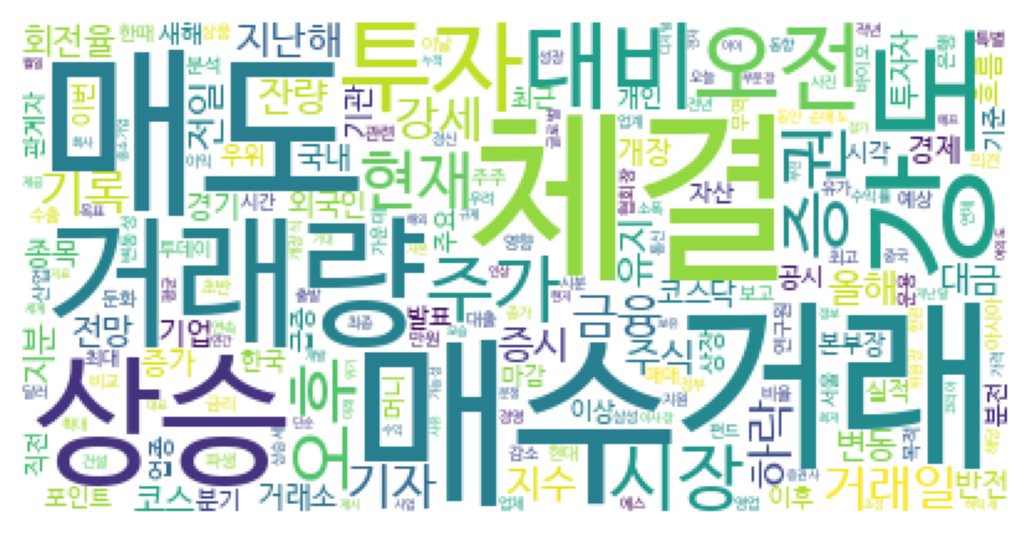

In [70]:
# word cloud 만들기
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',background_color='white').generate_from_frequencies(word)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [71]:
def google_authenticate():
  # Authenticate first so the Google Drive library can detect your credentials.
  from google.colab import auth
  auth.authenticate_user()

  from googleapiclient.discovery import build
  drive_service = build('drive', 'v3')
  return drive_service

In [72]:
drive_service = google_authenticate()

In [73]:
def read_file(file_id):


  file_id = file_id

  import io
  from googleapiclient.http import MediaIoBaseDownload

  request = drive_service.files().get_media(fileId=file_id)
  downloaded = io.BytesIO()
  downloader = MediaIoBaseDownload(downloaded, request)
  done = False
  while done is False:
    _, done = downloader.next_chunk()

  downloaded.seek(0)
  return downloaded

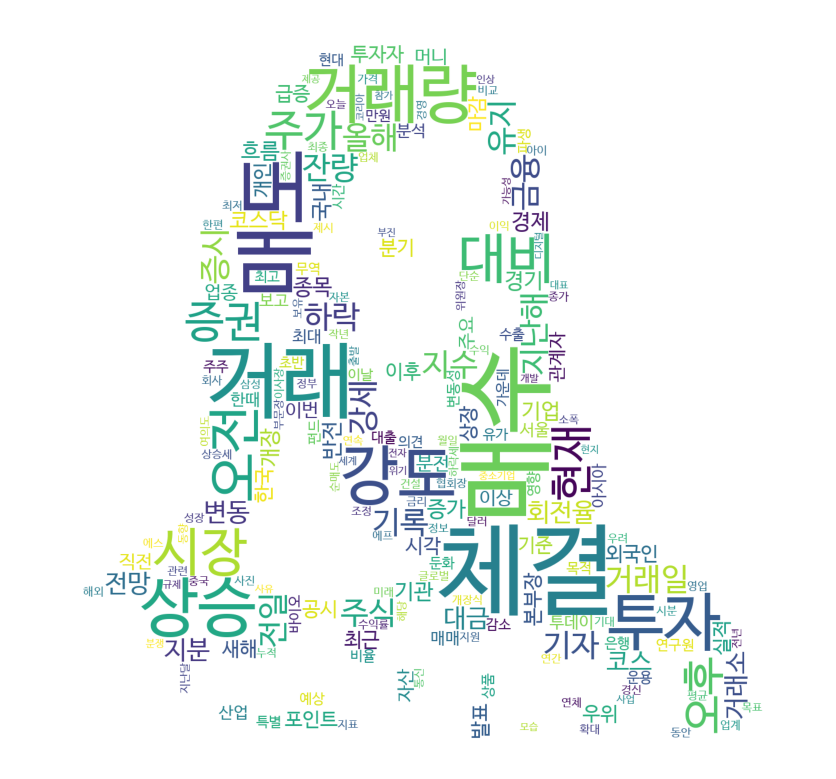

In [74]:
from PIL import Image
image_file = read_file("1sVG9bZ1LXyreX9SYQ92EbEOd8_Q009bX")

# create mask
image_mask = np.array(Image.open(image_file))

wordcloud = WordCloud(font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',mask = image_mask,background_color='white').generate_from_frequencies(word)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# 딥러닝 모형을 이용하여 감정분류 해보기

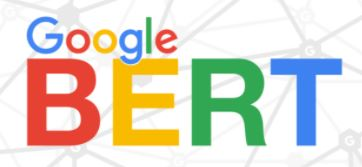

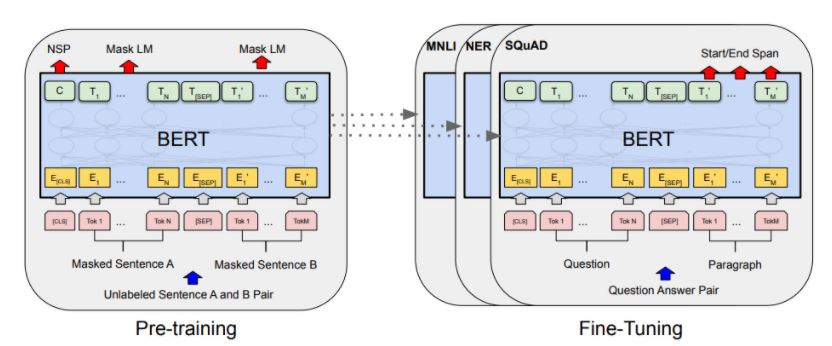

In [75]:
!pip install transformers

In [76]:
import torch

from transformers import BertTokenizer
from transformers import BertForSequenceClassification, AdamW, BertConfig
from transformers import get_linear_schedule_with_warmup
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import random
import time
import datetime

In [77]:
# 데이터 다운로드
!git clone https://github.com/e9t/nsmc.git

fatal: destination path 'nsmc' already exists and is not an empty directory.


In [78]:
train = pd.read_csv("nsmc/ratings_train.txt", sep='\t')
test = pd.read_csv("nsmc/ratings_test.txt", sep='\t')

print(train.shape)
print(test.shape)

(150000, 3)
(50000, 3)


In [79]:
train.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [80]:
# 리뷰 문장 추출
sentences = train['document']
sentences[:10]

0                                  아 더빙.. 진짜 짜증나네요 목소리
1                    흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2                                    너무재밓었다그래서보는것을추천한다
3                        교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정
4    사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...
5        막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.
6                                원작의 긴장감을 제대로 살려내지못했다.
7    별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단...
8                               액션이 없는데도 재미 있는 몇안되는 영화
9        왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?
Name: document, dtype: object

BERT 모델 형식

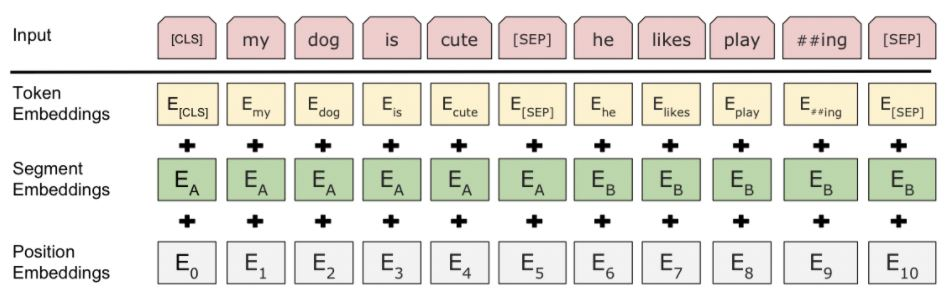

* BERT의 입력은 위의 그림과 같은 형식
* Classification을 뜻하는 [CLS] 심볼이 제일 앞에 삽입
* Fine tunning 시 출력에서 이 위치의 값을 사용하여 분류
* [SEP]은 Seperation을 지칭하며, 두 문장을 구분하는 역할 수행


In [81]:
# BERT의 입력 형식에 맞게 변환
sentences = ["[CLS] " + str(sentence) + " [SEP]" for sentence in sentences]
sentences[:10]

['[CLS] 아 더빙.. 진짜 짜증나네요 목소리 [SEP]',
 '[CLS] 흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나 [SEP]',
 '[CLS] 너무재밓었다그래서보는것을추천한다 [SEP]',
 '[CLS] 교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정 [SEP]',
 '[CLS] 사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다 [SEP]',
 '[CLS] 막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움. [SEP]',
 '[CLS] 원작의 긴장감을 제대로 살려내지못했다. [SEP]',
 '[CLS] 별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단 낫겟다 납치.감금만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네 [SEP]',
 '[CLS] 액션이 없는데도 재미 있는 몇안되는 영화 [SEP]',
 '[CLS] 왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나? [SEP]']

In [82]:
# 라벨 추출
labels = train['label'].values
labels

array([0, 1, 0, ..., 0, 1, 0])

In [83]:
# BERT의 토크나이저로 문장을 토큰으로 분리
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased', do_lower_case=False)
tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]

print (sentences[0])
print (tokenized_texts[0])

[CLS] 아 더빙.. 진짜 짜증나네요 목소리 [SEP]
['[CLS]', '아', '더', '##빙', '.', '.', '진', '##짜', '짜', '##증', '##나', '##네', '##요', '목', '##소', '##리', '[SEP]']


* BERT는 형태소분석으로 토큰을 분리하지 않음
* WordPiece라는 통계적인 방식을 사용: 한 단어내에서 자주 나오는 글자들을 붙여서 하나의 토큰으로 만들며, 언어에 상관없이 토큰을 생성할 수 있다는 장점있고  신조어 같이 사전에 없는 단어를 처리하기도 용이함

* 위의 결과에서 ## 기호는 앞 토큰과 이어진다는 표시이며, 토크나이저는 여러 언어의 데이터를 기반으로 만든 'bert-base-multilingual-cased'를 사용

* bert-base-multilingual-cased 는 한글어도 지원하고 있음

In [84]:
# 입력 토큰의 최대 시퀀스 길이
MAX_LEN = 128

# 토큰을 숫자 인덱스로 변환
input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]

# 문장을 MAX_LEN 길이에 맞게 자르고, 모자란 부분을 패딩 0으로 채움
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

input_ids[0]

array([   101,   9519,   9074, 119005,    119,    119,   9708, 119235,
         9715, 119230,  16439,  77884,  48549,   9284,  22333,  12692,
          102,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
      

In [85]:
input_ids = input_ids[:1000]
labels = labels[:1000]
len(input_ids)

1000

* 보통 딥러닝 모델에는 토큰 자체를 입력으로 넣을수 없기 때문에, 숫자로 변환하는 것이 필요하며 이과정을 Embedding 이라고 함

* BERT의 토크나이저는 {단어토큰:인덱스}로 구성된 단어사전을 가지고 있으며, 이 단어사전을 참조하여 토큰을 인덱스로 변형시켜줌

In [86]:
# 어텐션 마스크 초기화
attention_masks = []

# 어텐션 마스크를 패딩이 아니면 1, 패딩이면 0으로 설정
# 패딩 부분은 BERT 모델에서 어텐션을 수행하지 않아 속도 향상
for seq in input_ids:
    seq_mask = [float(i>0) for i in seq]
    attention_masks.append(seq_mask)

print(attention_masks[0])

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


# GPU 사용

In [87]:
# 훈련셋과 검증셋으로 분리
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids,
                                                                                    labels,
                                                                                    random_state=2018,
                                                                                    test_size=0.1)

# 어텐션 마스크를 훈련셋과 검증셋으로 분리
train_masks, validation_masks, _, _ = train_test_split(attention_masks,
                                                       input_ids,
                                                       random_state=2018,
                                                       test_size=0.1)

# 데이터를 파이토치의 텐서로 변환
train_inputs = torch.tensor(train_inputs)
train_labels = torch.tensor(train_labels)
train_masks = torch.tensor(train_masks)
validation_inputs = torch.tensor(validation_inputs)
validation_labels = torch.tensor(validation_labels)
validation_masks = torch.tensor(validation_masks)

print(train_inputs[0])
print(train_labels[0])
print(train_masks[0])
print(validation_inputs[0])
print(validation_labels[0])
print(validation_masks[0])

tensor([   101,   9359, 118832, 101814,   9034,  29364,  16439,  12424,   9690,
        118632,  11903,  61400,  86181,  10459,   9967,  15891,  13764,  63243,
           106,    106,   9968,  18623, 100543,   8848,  17138,  58931,  17730,
        118930,  11261,  10459,   9061,  98379,    198,    102,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0, 

In [88]:
# 배치 사이즈
batch_size = 16

# 파이토치의 DataLoader로 입력, 마스크, 라벨을 묶어 데이터 설정
# 학습시 배치 사이즈 만큼 데이터를 가져옴
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

In [89]:
# 분류를 위한 BERT 모델 생성
model = BertForSequenceClassification.from_pretrained("bert-base-multilingual-cased", num_labels=2)
model.cuda()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12

In [90]:
# 정확도 계산 함수
def flat_accuracy(preds, labels):

    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [91]:
# 시간 표시 함수
def format_time(elapsed):

    # 반올림
    elapsed_rounded = int(round((elapsed)))

    # hh:mm:ss으로 형태 변경
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [92]:
# 옵티마이저 설정
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # 학습률
                  eps = 1e-8 # 0으로 나누는 것을 방지하기 위한 epsilon 값
                )

# 에폭수
epochs = 4

# 총 훈련 스텝 : 배치반복 횟수 * 에폭
total_steps = len(train_dataloader) * epochs

# 처음에 학습률을 조금씩 변화시키는 스케줄러 생성
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = 0,
                                            num_training_steps = total_steps)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [93]:
# 재현을 위해 랜덤시드 고정
seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# 그래디언트 초기화
model.zero_grad()

# 에폭만큼 반복
for epoch_i in range(epochs):

    # ========================================
    #               Training
    # ========================================

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # 시작 시간 설정
    t0 = time.time()

    # 로스 초기화
    total_loss = 0

    # 훈련모드로 변경
    model.train()

    # 데이터로더에서 배치만큼 반복하여 가져옴
    for step, batch in enumerate(train_dataloader):
        # 경과 정보 표시
        if step % 500 == 0 and not step == 0:
            elapsed = format_time(time.time() - t0)
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # 배치를 GPU에 넣음
        batch = tuple(t.cuda() for t in batch)

        # 배치에서 데이터 추출
        b_input_ids, b_input_mask, b_labels = batch

        # Forward 수행
        outputs = model(b_input_ids,
                        token_type_ids=None,
                        attention_mask=b_input_mask,
                        labels=b_labels)

        # 로스 구함
        loss = outputs[0]

        # 총 로스 계산
        total_loss += loss.item()

        # Backward 수행으로 그래디언트 계산
        loss.backward()

        # 그래디언트 클리핑
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # 그래디언트를 통해 가중치 파라미터 업데이트
        optimizer.step()

        # 스케줄러로 학습률 감소
        scheduler.step()

        # 그래디언트 초기화
        model.zero_grad()

    # 평균 로스 계산
    avg_train_loss = total_loss / len(train_dataloader)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(format_time(time.time() - t0)))

    # ========================================
    #               Validation
    # ========================================

    print("")
    print("Running Validation...")

    #시작 시간 설정
    t0 = time.time()

    # 평가모드로 변경
    model.eval()

    # 변수 초기화
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    # 데이터로더에서 배치만큼 반복하여 가져옴
    for batch in validation_dataloader:
        # 배치를 GPU에 넣음
        batch = tuple(t.cuda() for t in batch)

        # 배치에서 데이터 추출
        b_input_ids, b_input_mask, b_labels = batch

        # 그래디언트 계산 안함
        with torch.no_grad():
            # Forward 수행
            outputs = model(b_input_ids,
                            token_type_ids=None,
                            attention_mask=b_input_mask)

        # 로스 구함
        logits = outputs[0]

        # CPU로 데이터 이동
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # 출력 로짓과 라벨을 비교하여 정확도 계산
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)
        eval_accuracy += tmp_eval_accuracy
        nb_eval_steps += 1

    print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))

print("")
print("Training complete!")


======== Epoch 1 / 4 ========
Training...

  Average training loss: 0.67
  Training epcoh took: 0:00:20

Running Validation...
  Accuracy: 0.55
  Validation took: 0:00:01

======== Epoch 2 / 4 ========
Training...

  Average training loss: 0.54
  Training epcoh took: 0:00:21

Running Validation...
  Accuracy: 0.68
  Validation took: 0:00:01

======== Epoch 3 / 4 ========
Training...

  Average training loss: 0.35
  Training epcoh took: 0:00:20

Running Validation...
  Accuracy: 0.70
  Validation took: 0:00:01

======== Epoch 4 / 4 ========
Training...

  Average training loss: 0.26
  Training epcoh took: 0:00:20

Running Validation...
  Accuracy: 0.62
  Validation took: 0:00:01

Training complete!


In [94]:
# 입력 데이터 변환
def convert_input_data(sentences):

    # BERT의 토크나이저로 문장을 토큰으로 분리
    tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]

    # 입력 토큰의 최대 시퀀스 길이
    MAX_LEN = 128

    # 토큰을 숫자 인덱스로 변환
    input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]

    # 문장을 MAX_LEN 길이에 맞게 자르고, 모자란 부분을 패딩 0으로 채움
    input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

    # 어텐션 마스크 초기화
    attention_masks = []

    # 어텐션 마스크를 패딩이 아니면 1, 패딩이면 0으로 설정
    # 패딩 부분은 BERT 모델에서 어텐션을 수행하지 않아 속도 향상
    for seq in input_ids:
        seq_mask = [float(i>0) for i in seq]
        attention_masks.append(seq_mask)

    # 데이터를 파이토치의 텐서로 변환
    inputs = torch.tensor(input_ids)
    masks = torch.tensor(attention_masks)

    return inputs, masks

In [97]:
# 문장 테스트
def test_sentences(sentences):

    # 평가모드로 변경
    model.eval()

    # 문장을 입력 데이터로 변환
    inputs, masks = convert_input_data(sentences)

    # 데이터를 GPU에 넣음
    b_input_ids = inputs.cuda()
    b_input_mask = masks.cuda()

    # 그래디언트 계산 안함
    with torch.no_grad():
        # Forward 수행
        outputs = model(b_input_ids,
                        token_type_ids=None,
                        attention_mask=b_input_mask)

    # 로스 구함
    logits = outputs[0]

    # CPU로 데이터 이동
    logits = logits.detach().cpu().numpy()

    return logits

In [98]:
logits = test_sentences(['연기는 별로지만 재미 하나는 끝내줌!'])

print(logits)
print(np.argmax(logits))

logits = test_sentences(['주연배우가 아깝다. 총체적 난국...'])

print(np.argmax(logits))


[[-0.64124817  1.0350167 ]]
1
0


In [99]:
test = test_sentences([news['본문'][100]])
print(news['본문'][100])
print(np.argmax(test))

국제유가는 올해 마지막 날인 31일(현지시간) 오름세를 기록했지만 올해 전체로는 20% 이상 떨어졌다... .. .. .. ..이날 뉴욕상업거래소(NYMEX)에서 내년 2월 인도분 서부 텍사스산 원유(WTI)는 전 거래일보다 배럴당 0.2%(0.08달러) 오른 45.41달러에 거래를 마쳤다... .. .. .. ..런던 ICE 선물거래소의 내년 3월물 ..
0


# CPU를 사용하는 경우

In [100]:
# 연산 속도가 느리므로 데이터 수 축소
input_ids = input_ids[:500]
labels = labels[:500]
len(input_ids)

500

In [102]:
# 어텐션 마스크 초기화
attention_masks = []

# 어텐션 마스크를 패딩이 아니면 1, 패딩이면 0으로 설정
# 패딩 부분은 BERT 모델에서 어텐션을 수행하지 않아 속도 향상
for seq in input_ids:
    seq_mask = [float(i>0) for i in seq]
    attention_masks.append(seq_mask)

print(attention_masks[0])

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [103]:
# 훈련셋과 검증셋으로 분리
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids,
                                                                                    labels,
                                                                                    random_state=2018,
                                                                                    test_size=0.1)

# 어텐션 마스크를 훈련셋과 검증셋으로 분리
train_masks, validation_masks, _, _ = train_test_split(attention_masks,
                                                       input_ids,
                                                       random_state=2018,
                                                       test_size=0.1)

# 데이터를 파이토치의 텐서로 변환
train_inputs = torch.tensor(train_inputs)
train_labels = torch.tensor(train_labels)
train_masks = torch.tensor(train_masks)
validation_inputs = torch.tensor(validation_inputs)
validation_labels = torch.tensor(validation_labels)
validation_masks = torch.tensor(validation_masks)

print(train_inputs[0])
print(train_labels[0])
print(train_masks[0])
print(validation_inputs[0])
print(validation_labels[0])
print(validation_masks[0])

tensor([  101,   100,  9186, 16617, 15001, 30858, 18227, 11903,   102,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0])

In [104]:
# 배치 사이즈
batch_size = 16

# 파이토치의 DataLoader로 입력, 마스크, 라벨을 묶어 데이터 설정
# 학습시 배치 사이즈 만큼 데이터를 가져옴
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

In [105]:
# 분류를 위한 BERT 모델 생성
model = BertForSequenceClassification.from_pretrained("bert-base-multilingual-cased", num_labels=2)
# model.cuda()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [106]:
# 옵티마이저 설정
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # 학습률
                  eps = 1e-8 # 0으로 나누는 것을 방지하기 위한 epsilon 값
                )

# 에폭수
epochs = 4

# 총 훈련 스텝 : 배치반복 횟수 * 에폭
total_steps = len(train_dataloader) * epochs

# 처음에 학습률을 조금씩 변화시키는 스케줄러 생성
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = 0,
                                            num_training_steps = total_steps)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [107]:
# 재현을 위해 랜덤시드 고정
seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# 그래디언트 초기화
model.zero_grad()

# 에폭만큼 반복
for epoch_i in range(epochs):

    # ========================================
    #               Training
    # ========================================

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # 시작 시간 설정
    t0 = time.time()

    # 로스 초기화
    total_loss = 0

    # 훈련모드로 변경
    model.train()

    # 데이터로더에서 배치만큼 반복하여 가져옴
    for step, batch in enumerate(train_dataloader):
        # 경과 정보 표시
        if step % 500 == 0 and not step == 0:
            elapsed = format_time(time.time() - t0)
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # 배치에서 데이터 추출
        b_input_ids, b_input_mask, b_labels = batch

        # Forward 수행
        outputs = model(b_input_ids,
                        token_type_ids=None,
                        attention_mask=b_input_mask,
                        labels=b_labels)

        # 로스 구함
        loss = outputs[0]

        # 총 로스 계산
        total_loss += loss.item()

        # Backward 수행으로 그래디언트 계산
        loss.backward()

        # 그래디언트 클리핑
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # 그래디언트를 통해 가중치 파라미터 업데이트
        optimizer.step()

        # 스케줄러로 학습률 감소
        scheduler.step()

        # 그래디언트 초기화
        model.zero_grad()

    # 평균 로스 계산
    avg_train_loss = total_loss / len(train_dataloader)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(format_time(time.time() - t0)))

    # ========================================
    #               Validation
    # ========================================

    print("")
    print("Running Validation...")

    #시작 시간 설정
    t0 = time.time()

    # 평가모드로 변경
    model.eval()

    # 변수 초기화
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    # 데이터로더에서 배치만큼 반복하여 가져옴
    for batch in validation_dataloader:

        # 배치에서 데이터 추출
        b_input_ids, b_input_mask, b_labels = batch

        # 그래디언트 계산 안함
        with torch.no_grad():
            # Forward 수행
            outputs = model(b_input_ids,
                            token_type_ids=None,
                            attention_mask=b_input_mask)

        # 로스 구함
        logits = outputs[0]

        # CPU로 데이터 이동
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # 출력 로짓과 라벨을 비교하여 정확도 계산
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)
        eval_accuracy += tmp_eval_accuracy
        nb_eval_steps += 1

    print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))

print("")
print("Training complete!")


======== Epoch 1 / 4 ========
Training...

  Average training loss: 0.68
  Training epcoh took: 0:06:20

Running Validation...
  Accuracy: 0.62
  Validation took: 0:00:11

======== Epoch 2 / 4 ========
Training...

  Average training loss: 0.53
  Training epcoh took: 0:06:19

Running Validation...
  Accuracy: 0.53
  Validation took: 0:00:13

======== Epoch 3 / 4 ========
Training...

  Average training loss: 0.35
  Training epcoh took: 0:06:35

Running Validation...
  Accuracy: 0.69
  Validation took: 0:00:13

======== Epoch 4 / 4 ========
Training...

  Average training loss: 0.24
  Training epcoh took: 0:06:34

Running Validation...
  Accuracy: 0.59
  Validation took: 0:00:11

Training complete!


In [108]:
# 문장 테스트
def test_sentences(sentences):

    # 평가모드로 변경
    model.eval()

    # 문장을 입력 데이터로 변환
    inputs, masks = convert_input_data(sentences)

    # 그래디언트 계산 안함
    with torch.no_grad():
        # Forward 수행
        outputs = model(inputs,
                        token_type_ids=None,
                        attention_mask=masks)

    # 로스 구함
    logits = outputs[0]

    # CPU로 데이터 이동
    logits = logits.detach().cpu().numpy()

    return logits

[과제] News 데이터를 이용하여 텍스트 분석 수행해보기
1. 강의 중 배운 텍스트 분석 기법을 적용해보고, 워드 클라우드를 출력하여 제출하기
2. 학습한 bert 모델에 News 데이터를 넣어 결과를 도출하기, (학습 데이터에 출력된 결과를 merging 하여 제출)
